# N-Step SARSA




In [2]:
# import 
import gym
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import *

### Create the environment, value table and policy

#### Environment

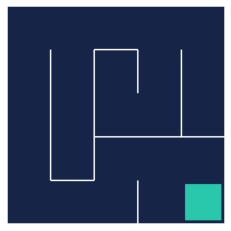

In [3]:
# environment
env = Maze()

# frame
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

#### Value Table $Q(s, a)$

In [4]:
# value table
state_size = env.observation_space.nvec
action_size = env.action_space.n
q_table = np.zeros(shape=(state_size[0], state_size[1], action_size))

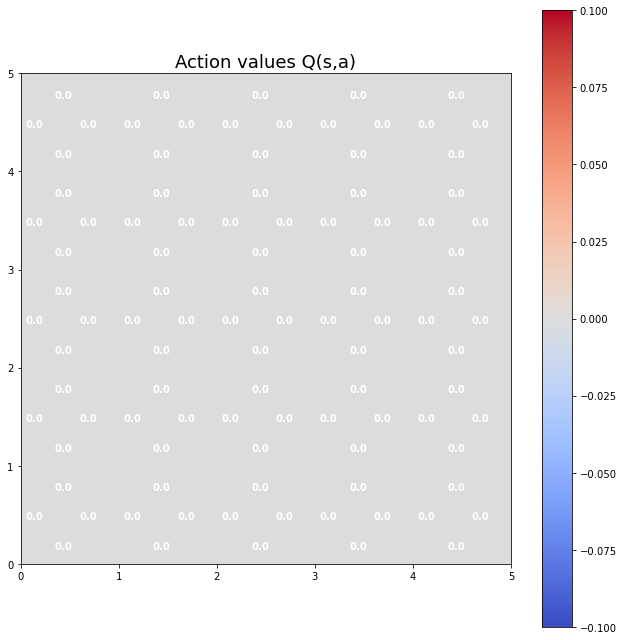

In [5]:
# plot the action value
plot_action_values(q_table)

#### Policy $\pi(s)$

In [9]:
# epsilon greedy policy
def policy(state, epsilon=.4):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        action = q_table[state]
        return np.random.choice(np.flatnonzero(action == action.max()))

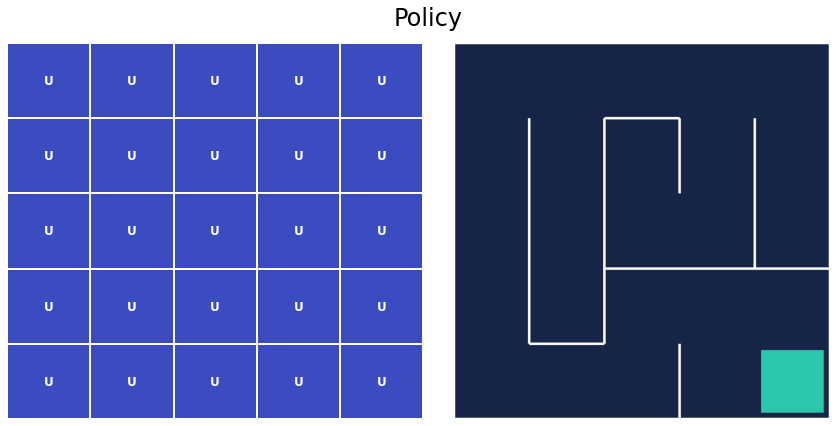

In [10]:
# plot policy
plot_policy(q_table, frame)

### Implement N-Step SARSA algorithm

In [13]:
def n_step_sarsa(q_table, policy, episodes, learning_rate=.1, discount_factor=.99, epsilon=.2, n=8):
    for _ in range(1, episodes+1):
        state = env.reset()
        done = False
        action = policy(state, epsilon)
        state_transition = []
        t = 0
        
        while t - n < len(state_transition):
            # execute an action in env
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                state_transition.append([state, action, reward])
                
            
            # update q table estimate
            if t >= n:
                # compute return
                # G = r1 + gamma * r2 + gamma^2 * r3 + ... + gamma^n * Q(Sn, An)
                G = (1 - done) * q_table[next_state][next_action]
                for state_t, action_t, reward_t in reversed(state_transition[t-n:]):
                    G = reward_t + discount_factor * G
                    
                q_table[state_t][action_t] += learning_rate * (G - q_table[state_t][action_t])
                
            t+=1
            state = next_state
            action = next_action

In [14]:
n_step_sarsa(q_table, policy, 1000)

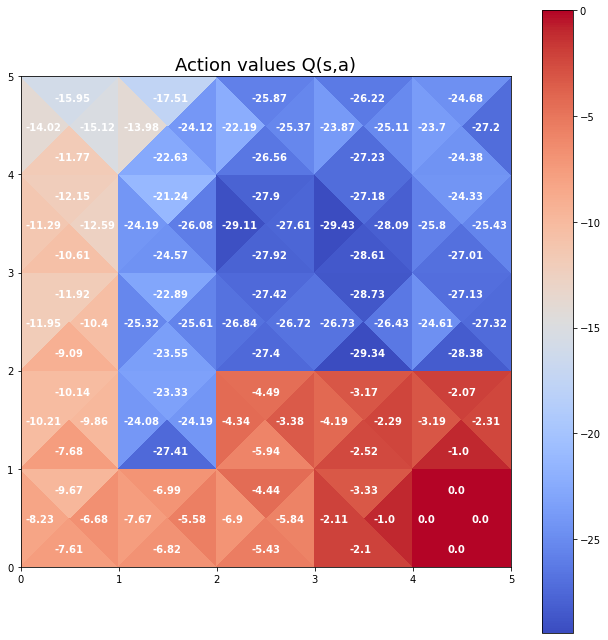

In [15]:
plot_action_values(q_table)

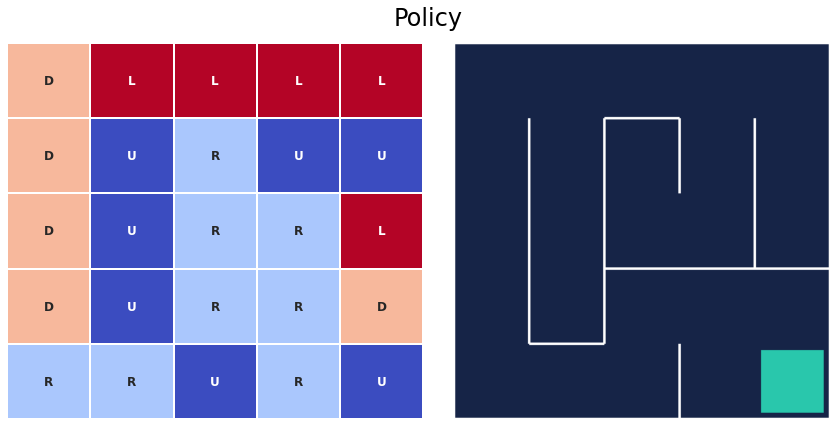

In [16]:
plot_policy(q_table, frame)

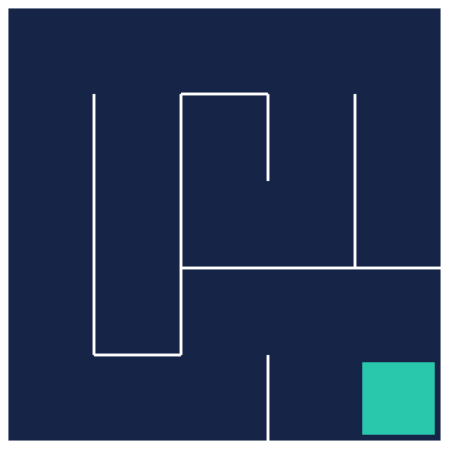

In [19]:
test_agent(env, policy, episodes=1)